In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math


In [2]:

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

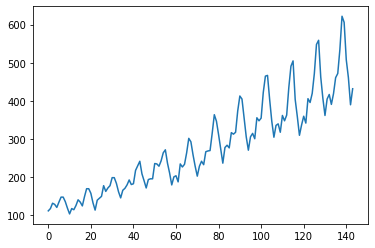

In [6]:
df = read_csv('airline-Passengers.csv', usecols=[1])
plt.plot(df)

#### Convert pandas dataframe to numpy array


In [7]:
df1= df.values
df1 = df1.astype('float32')

In [8]:
df1

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

### normalize the dataset

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(df1)

In [10]:
train_size = int(len(df1) * 0.66)
test_size = len(df1) - train_size
train, test = df1[0:train_size,:], df1[train_size:len(df1),:]

### creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
### and Y is the number of passengers at the next time(t + 1).

In [11]:

def to_sequences(df1, seq_size=1):
    x = []
    y = []

    for i in range(len(df1)-seq_size-1):
        #print(i)
        window = df1[i:(i+seq_size), 0]
        x.append(window)
        y.append(df1[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [12]:
seq_size = 10 # Number of time steps to look back 
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [14]:
trainX.shape


(84, 10)

In [15]:
testX.shape

(38, 10)

In [16]:
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu')) #12
model.add(Dense(32, activation='relu'))  #8
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
3/3 - 1s - loss: 0.1414 - acc: 0.0119 - val_loss: 0.5693 - val_acc: 0.0000e+00
Epoch 2/100
3/3 - 0s - loss: 0.0813 - acc: 0.0119 - val_loss: 0.3184 - val_acc: 0.0000e+00
Epoch 3/100
3/3 - 0s - loss: 0.0424 - acc: 0.0119 - val_loss: 0.1624 - val_acc: 0.0000e+00
Epoch 4/100
3/3 - 0s - loss: 0.0193 - acc: 0.0119 - val_loss: 0.0759 - val_acc: 0.0000e+00
Epoch 5/100
3/3 - 0s - loss: 0.0086 - acc: 0.0119 - val_loss: 0.0375 - val_acc: 0.0263
Epoch 6/100
3/3 - 0s - loss: 0.0070 - acc: 0.0119 - val_loss: 0.0294 - val_acc: 0.0263
Epoch 7/100
3/3 - 0s - loss: 0.0085 - acc: 0.0119 - val_loss: 0.0338 - val_acc: 0.0263
Epoch 8/100
3/3 - 0s - loss: 0.0103 - acc: 0.0119 - val_loss: 0.0371 - val_acc: 0.0263
Epoch 9/100
3/3 - 0s - loss: 0.0106 - acc: 0.0119 - val_loss: 0.0354 - val_acc: 0.0263
Epoch 10/100
3/3 - 0s - loss: 0.0095 - acc: 0.0119 - val_loss: 0.0318 - val_acc: 0.0263
Epoch 11/100
3/3 - 0s - loss: 0.0080 - acc: 0.0119 - val_loss: 0.0288 - val_acc: 0.0263
Epoch 12/100
3/3 - 0s - l

In [18]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [19]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [22]:
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

In [25]:
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(df1)-1, :] = testPredict


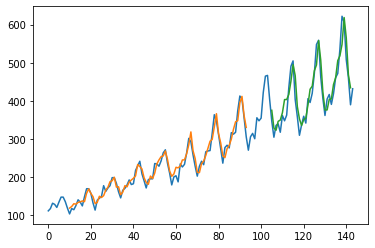

In [26]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()